1 of 1000
51 of 1000
101 of 1000
151 of 1000
201 of 1000
251 of 1000
301 of 1000
351 of 1000
401 of 1000
451 of 1000
501 of 1000
551 of 1000
601 of 1000
651 of 1000
701 of 1000
751 of 1000
801 of 1000
851 of 1000
901 of 1000
951 of 1000
51 of 1000
101 of 1000
151 of 1000
201 of 1000
251 of 1000
301 of 1000
351 of 1000
401 of 1000
451 of 1000
501 of 1000
551 of 1000
601 of 1000
651 of 1000
701 of 1000
751 of 1000
801 of 1000
851 of 1000
901 of 1000
951 of 1000


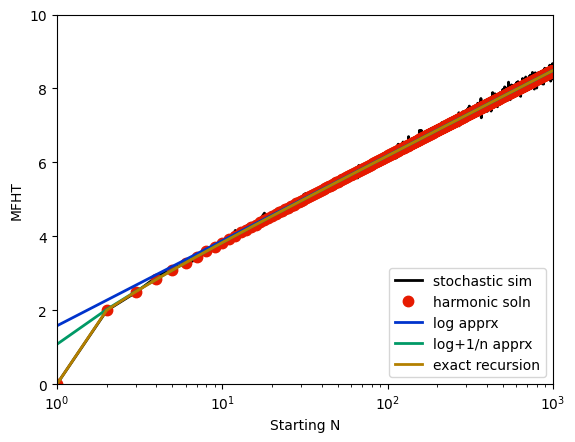

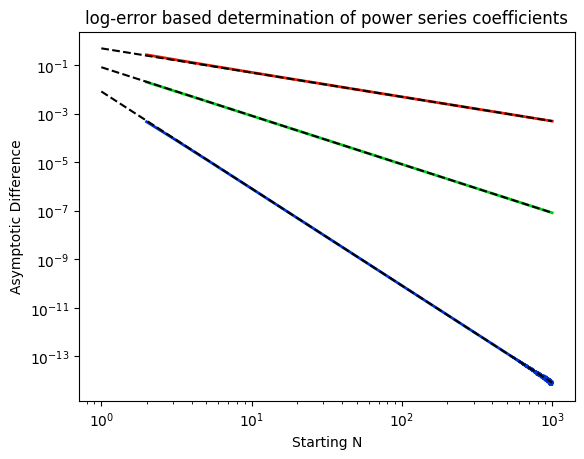

In [23]:
# Tristan Ursell
# April 2024
# Various solutions, including stochastic simulation and analytic solution, of the stochastic halting problem.
#

import numpy as np
import matplotlib.pyplot as plt

def stochastic_halting_problem():
    # Starting number for all trials
    N = 1000

    # Number of trials
    T = 1000

    # Stochastic simulation
    c_vec = np.zeros(N)
    for i in range(1, N):
        q_vec = np.zeros(T)
        for j in range(T):
            n = i+1
            q = 0
            while n > 1:
                q += 1
                n = np.random.randint(1, n+1)
            q_vec[j] = q
        c_vec[i] = np.mean(q_vec)

        if i % 50==1:
          print(f"{i} of {N}")

    
    # Iterative solver
    tau0i = np.zeros(N)
    tau0i[1] = 2
    for i in range(2, N):
        tau0i[i] = (i+1) / i + 1 / i * np.sum(tau0i[:i])
        
        if i % 50==1:
          print(f"{i} of {N}")
    

    # Recursive solution
    fout = np.zeros(N)
    fout[0] = 0
    fout[1] = 2

    for i in range(2,N):
        fout[i] = 1 + harmonic_number(i)
    

    # Plot stochastic, analytical, recursive, asymptotic approximations
    model1 = np.log(np.arange(1, N+1)) + 1 + np.euler_gamma
    model2 = model1 - 1 / (2 * np.arange(1, N+1))
    model3 = model2 - 1 / (12 * np.arange(1, N+1)**2)
    model4 = model3 + 1 / (120 * np.arange(1, N+1)**4)
    
    
    plt.figure()
    plt.semilogx(range(1,N+1), c_vec, linewidth=2, color=[0, 0, 0])
    plt.semilogx(range(1,N+1), fout, '.', markersize=15, color=[0.9, 0.1, 0])
    plt.semilogx(range(1,N+1), model1, linewidth=2, color=[0, 0.2, 0.8])
    plt.semilogx(range(1,N+1), model2, linewidth=2, color=[0, 0.6, 0.4])
    plt.semilogx(range(1,N+1), tau0i, linewidth=2, color=[0.7, 0.5, 0])
    plt.box(True)
    plt.xlabel('Starting N')
    plt.ylabel('MFHT')
    plt.xlim(1,N)
    plt.ylim(0,10)
    plt.legend(['stochastic sim', 'harmonic soln', 'log apprx', 'log+1/n apprx', 'exact recursion'], loc='lower right')
    plt.savefig(f'MFHT_stochastic_halting.svg', format='svg')
    plt.show()

    
    # Plot analytical vs stochastic simulation
    plt.figure()
    plt.loglog(np.arange(2, N+1), model1[1:] - fout[1:], linewidth=2, color=[0.9, 0.1, 0])
    plt.loglog(np.arange(1, N+1), 1 / (2 * np.arange(1, N+1)), 'k--')
    plt.loglog(np.arange(2, N+1), model2[1:] - fout[1:], linewidth=2, color=[0, 0.8, 0.1])
    plt.loglog(np.arange(1, N+1), 1 / (12 * np.arange(1, N+1)**2), 'k--')
    plt.loglog(np.arange(2, N+1), -(model3[1:] - fout[1:]), linewidth=2, color=[0, 0.2, 0.8])
    plt.loglog(np.arange(1, N+1), 1 / (120 * np.arange(1, N+1)**4), 'k--')
    plt.loglog(np.arange(2, N+1), -(model4[1:] + fout[1:]), linewidth=2, color=[0, 0.2, 0.8])
    plt.box(True)
    plt.xlabel('Starting N')
    plt.ylabel('Asymptotic Difference')
    plt.title('log-error based determination of power series coefficients')
    plt.show()
    


def harmonic_number(n):
  """
  Calculates the nth harmonic number.

  Args:
    n: An integer greater than 0.

  Returns:
    The nth harmonic number.
  """
  if n <= 0:
    raise ValueError("n must be greater than 0")
  return sum(1 / i for i in range(1, n + 1))

#execute
stochastic_halting_problem()
